<a href="https://colab.research.google.com/github/iamMchoi/MNIST/blob/master/MNIST_CNNwithTf_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## Initialize Data

In [2]:
#Read Data from Keras
from tensorflow import keras
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


x_train data:  (60000, 28, 28) y_train data: (60000,)
x_test data:  (10000, 28, 28) y_test data: (10000,)


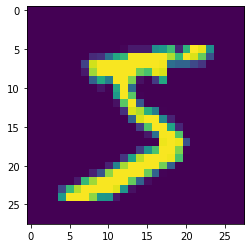

In [3]:
print("x_train data: ", x_train.shape,"y_train data:", y_train.shape)
print("x_test data: ", x_test.shape,"y_test data:", y_test.shape)

plt.imshow(x_train[0])

In [0]:
# Preprocess the data (these are Numpy arrays)
x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.   #image size(28x28), 1 channel : gray
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

##Build Model

In [5]:
model = tf.keras.Sequential()

model.add(layers.Conv2D(128,(3,3),activation='relu',input_shape=x_train.shape[1:],data_format="channels_last"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation=tf.nn.relu))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())  
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               819328    
_________________________________________

In [6]:
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer='adam', metrics=['accuracy'])
#optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), #optimizer=tf.keras.optimizers.Adam(0.01), 
history =model.fit(x_train, y_train, epochs=4, batch_size=64,  validation_split=0.2)  ### callbacks is for TensorBoard : callbacks=[tbCallBack]) 

Train on 48000 samples, validate on 12000 samples
Epoch 1/4
48000/48000 [==============================] - 273s 6ms/sample - loss: 0.1279 - acc: 0.9603 - val_loss: 0.0639 - val_acc: 0.9815
Epoch 2/4
48000/48000 [==============================] - 274s 6ms/sample - loss: 0.0409 - acc: 0.9870 - val_loss: 0.0417 - val_acc: 0.9883
Epoch 3/4
48000/48000 [==============================] - 275s 6ms/sample - loss: 0.0250 - acc: 0.9919 - val_loss: 0.0385 - val_acc: 0.9894
Epoch 4/4
48000/48000 [==============================] - 276s 6ms/sample - loss: 0.0179 - acc: 0.9940 - val_loss: 0.0413 - val_acc: 0.9907


In [0]:
#tensorboard_cbk = keras.callbacks.TensorBoard(log_dir='/full_path_to_your_logs')
#model.fit(dataset, epochs=10, callbacks=[tensorboard_cbk])

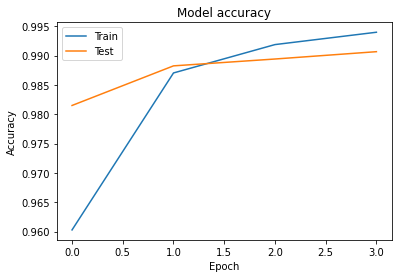

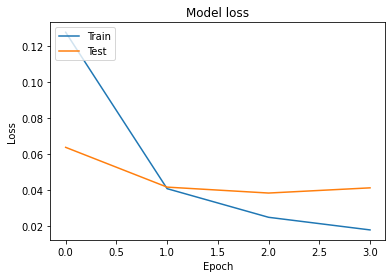

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Save the model and Load the model

In [0]:
## Mount Google drive before save the model
#from google.colab import drive
#drive.mount('/content/drive/')

## Save weights to a TensorFlow Checkpoint file
#DATA_PATH = "/content/drive/My Drive/Colab Notebooks/"
#model.save(DATA_PATH+"256_CNN.model")

## Load the Model
#model = tf.keras.models.load_model(DATA_PATH+"256_CNN.model")